<a href="https://colab.research.google.com/github/CatIsOutOfTheBag/Probability_and_Statistics/blob/main/Multiple_hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Природа множественной поверки гипотез

In [ ]:
import pandas as pd
import numpy as np

В 1950 году Джозеф Райн проводил эксперименты по выявлению людей с экстрасенсорными способностями.

Каждый испытуемый должен был угадать цвет каждой карты в последовательности из 10 карт. 

В таком опыте вероятность случайно угадать 9 или 10 карт из 10 составляет 11*2**(-10) — достаточно редкое событие, поэтому Райн считал его свидетельством того, что испытуемый — экстрасенс. 

Однако, поскольку в опыте участвовало 1000 человек, вероятность того, что хотя бы один из них случайно угадает 9 или 10 карт составляла примерно 0.

Действительно, из 1000 испытуемых 12 человек угадали 9 из 10 карт, двое — все 10 карт. В последующих экспериментах ни один из них не подтвердил свои способности.

In [ ]:
'''
будем Монте-Карлить
угадывать цвет карт
пусть 
0 - красная карта
1 - черная карта
в колоде равное количество черных и красных карт
''';

In [ ]:
np.random.binomial(1, 0.5, size=10) # 10 карт

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
# учистник пытается угадать карты
cards =np.random.binomial(1, 0.5, size=10) # 10 карт
guess =np.random.binomial(1, 0.5, size=10) # угадывание

In [ ]:
cards == guess

array([False, False,  True, False, False, False,  True, False, False,
        True])

In [ ]:
(cards == guess).sum() #сколько штук угадал

3

In [ ]:
(cards == guess).sum() >= 9 #это экстрасенс

False

In [ ]:
# какова вероятность угадать все карты?
from tqdm.notebook import tqdm
n=1000
result=[]
for _ in tqdm(range(n)):
  cards = np.random.binomial(1, 0.5, size=10) # 10 карт
  guess = np.random.binomial(1, 0.5, size=10) # угадывание
  result.append((cards == guess).sum() >= 9)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
np.mean(result)

0.008

In [ ]:
# вероятность угадать все карты = 1%

In [ ]:
'''
Посмотрим на задачу через гипотезы:
Н0: экстрасенсов нет
Н1: экстрасенсы есть

когда человек угадывает 9 и более карт из 10, мы считаем его экстрасенсом - 
отвергаем верную нулевую гипотезу.
Тогда 0,01 - это вероятность отвергнуть верную нулевую гипотезу = ошибка первого рода альфа
''';

In [ ]:
# теперь проверим, что из 1000 человек вроятность того, что хотя бы один угадывает как экстрасенс = 1%
# перепишем эксперимент в виде функции

def exp():
  cards = np.random.binomial(1, 0.5, size=10) # 10 карт
  guess = np.random.binomial(1, 0.5, size=10) # угадывание
  return (cards == guess).sum() >= 9

In [ ]:
t = [exp() for _ in range(1000)]

In [ ]:
# кто-то один угадал карты = есть хотя бы 1 true
any(t)

True

In [ ]:
# а вот тут видно, что если провести эксперимент на 1000 людей, то мы ТОЧНО встретим экстрасенса
np.mean([any([exp() for _ in range(1000)]) for _ in range(1000)])

1.0

In [ ]:
# можно увидеть, как увеличивается вроятность найти экстрасенса с ростом числа людей в группе
ppls = [10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000]
result = []
for ppl in tqdm(ppls):
  prob = np.mean([any([exp() for _ in range(ppl)]) for _ in range(1000)])
  result.append(prob)

  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame({'number_of_people': ppls,
                  'prob': result})

In [ ]:
t

,number_of_people,prob
0,10,0.092
1,20,0.189
2,30,0.282
3,40,0.361
4,50,0.414
5,60,0.506
6,70,0.532
7,80,0.590
8,90,0.600
9,100,0.651


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

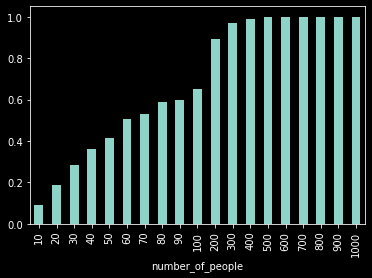

In [ ]:
t.set_index('number_of_people')['prob'].plot(kind='bar')

Применим формулу совершения хотя бы одной ошибки
1 - (1 - alpha)**m
http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7

In [ ]:
t['prob_formula'] = 1 - (1 - 0.01)**t['number_of_people']

In [ ]:
t

,number_of_people,prob,prob_formula
0,10,0.092,0.095618
1,20,0.189,0.182093
2,30,0.282,0.260300
3,40,0.361,0.331028
4,50,0.414,0.394994
5,60,0.506,0.452843
6,70,0.532,0.505161
7,80,0.590,0.552477
8,90,0.600,0.595268
9,100,0.651,0.633968


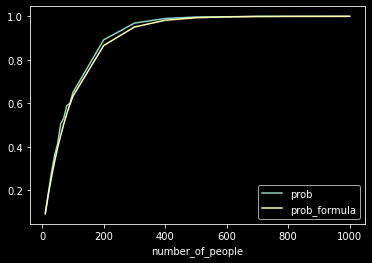

In [ ]:
# посмотрим как ведут себя prob и prob_formula на графике
t.set_index('number_of_people').plot()

#A/B тест. Множественная проверка гипотез

Что, если у нас три группы?
test1
test2
control

Если сравним test1 с control, затем test2 c control, 
получим 2 p_value и окажемся в эффекте множественной проверки гипотез

In [ ]:
# смоделируем эту ситуацию
# сгенерируем выборку из генеральной совокупности со средним значением 0.2
a = np.random.binomial(1,0.2,size=1030)
# вторую группу из той же совокупности
b = np.random.binomial(1,0.2,size=1030)
# нам нужно поймать рандомное расхождение

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
_, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)], alternative='two-sided')

In [ ]:
pval

0.8653581209596535

In [ ]:
'''
Важно! здесть p_val - это не мощность.
Это вероятность получить разницу средних значений на выборках а и b 
такую: abs(a.mean()-b.mean()) или больше (по абсолютному значению)
''';

In [ ]:
# будем делать два эксперимента
def experiment():
  a = np.random.binomial(1,0.2,size=1030)
  b = np.random.binomial(1,0.2,size=1030)
  _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)], alternative='two-sided')
  return pval

In [ ]:
[experiment() for _ in range(2)]

[0.6995538611585673, 0.7865181074271022]

In [ ]:
# проверим что p_value < 0.05 в этих двух экспериментах
[experiment() < 0.05 for _ in range(2)]

[False, False]

In [ ]:
# какова вероятность, что хотя бы в 1 из 2х экспериметов p_value < 0.05
any([experiment() < 0.05 for _ in range(2)])

False

In [ ]:
# какова вероятность словить случайное различие при двух проверках
np.mean([any([experiment() < 0.05 for _ in range(2)]) for _ in tqdm(range(10000))])

  0%|          | 0/10000 [00:00<?, ?it/s]

0.1004

In [ ]:
# проверим по формуле
# 1 - (1 - alpha)**m
1 - (1 - 0.05)**2

0.09750000000000003

In [ ]:
# теперь посмотрим что будет при трех группах
np.mean([any([experiment() < 0.05 for _ in range(3)]) for _ in tqdm(range(10000))])

  0%|          | 0/10000 [00:00<?, ?it/s]

0.1414

In [ ]:
# проверим по формуле
# 1 - (1 - alpha)**m
1 - (1 - 0.05)**3

0.1426250000000001

In [ ]:
# при десяти группах
np.mean([any([experiment() < 0.05 for _ in range(10)]) for _ in tqdm(range(10000))])

  0%|          | 0/10000 [00:00<?, ?it/s]

0.4092

In [ ]:
# проверим по формуле
# 1 - (1 - alpha)**m
1 - (1 - 0.05)**10

0.4012630607616213

In [ ]:
# при увеличении группы экспериментов повышается вероятность того, что хотя бы 1 эксперимент будет удачным
'''
в бизнесе часто сегментируют на множество групп
- молодые мамы
- старые алкоголики
- ...
Всего 10 групп

и на каждой группе тестируют коммерческое предложение
на каждой группе делают коммуникацию
и мы получаем 10 а/б тестов
Тогда есть 40% вероятность, что одна из групп стрельнет случайно

Поправка Бонферрони поможет невелировать этот эффект
альфу делим на количество групп
''';

In [ ]:
# при десяти группах с поправкой Бонферрони
np.mean([any([experiment() < (0.05 / 10) for _ in range(10)]) for _ in tqdm(range(10000))])

  0%|          | 0/10000 [00:00<?, ?it/s]

0.0497

In [ ]:
# но тогда из-за строгости мы снижаем мощность
# много успешных экспериментов будут признаны неуспешными

In [ ]:
# Кроме Бонферрони есть и другие методы борьбы с МПГ:
# Холма
# Шидака и другие
# Их так же можно сравнить в одном тесте и выбрать наилучшую поправку

# Забавный эффект

В мире так много переменных, что можно найти случайные корреляции (линейные зависимости)

https://www.tylervigen.com/spurious-correlations

Так и в bigData - чем больше переменных, тем больше вероятность словить фэйковую корреляцию.

Решение:

снизить дефолтную альфу до 0,005 - т.е. в 10 раз